# Limitation of Linear Regression

This notebook is short but will hopefully highlight the limitations of linear regression. A linear regression model is only able to identify **linear** relationships. 
We can use the famous [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) dataset to show that linear regression can return the same results for very different datasets.

In [1]:
# Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

%matplotlib inline

## The Anscombe Quartet

In [2]:
# Anscombe dataset includes 4 different data sets
anscombe = sns.load_dataset("anscombe")

In [3]:
# Get the descriptive statistics for each dataset
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

As you can see from the table above, all four datasets have very similar descriptive statistics. If we were to look only at this summary, we might incorrectly assume that the datasets also look quite similar.
Let's now calculate some summary statistics to plot the data with their regression lines.
An easy way to calculate a linear least-squares regression and return the interesting statistics is to use the `.linregress()` function from the `scipy.stats` module.

In [4]:
# Defining function using linregress of stats module 
# for building a linear regression model for each dataset
# Returns summary statistics
def get_summarystats(dataset):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=anscombe[anscombe.dataset==dataset].x,
                                                               y=anscombe[anscombe.dataset==dataset].y)
    
    
    return slope, intercept, r_value, p_value, std_err

In [5]:
# Getting summary statistics for each dataset
results = []
for dataset in 'I II III IV'.split():
    slope, intercept, r_value, p_value, std_err = get_summarystats(dataset)
    results.append([slope, intercept, r_value])

print('[slope, intercept, r_value] for each dataset')
results

[slope, intercept, r_value] for each dataset


[[0.5000909090909091, 3.0000909090909103, 0.8164205163448399],
 [0.5000000000000001, 3.000909090909089, 0.816236506000243],
 [0.4997272727272729, 3.002454545454544, 0.8162867394895984],
 [0.4999090909090909, 3.0017272727272726, 0.8165214368885028]]

The linear regression parameters are also almost identical. However, the datasets look significantly different when we plot them with their regression lines.

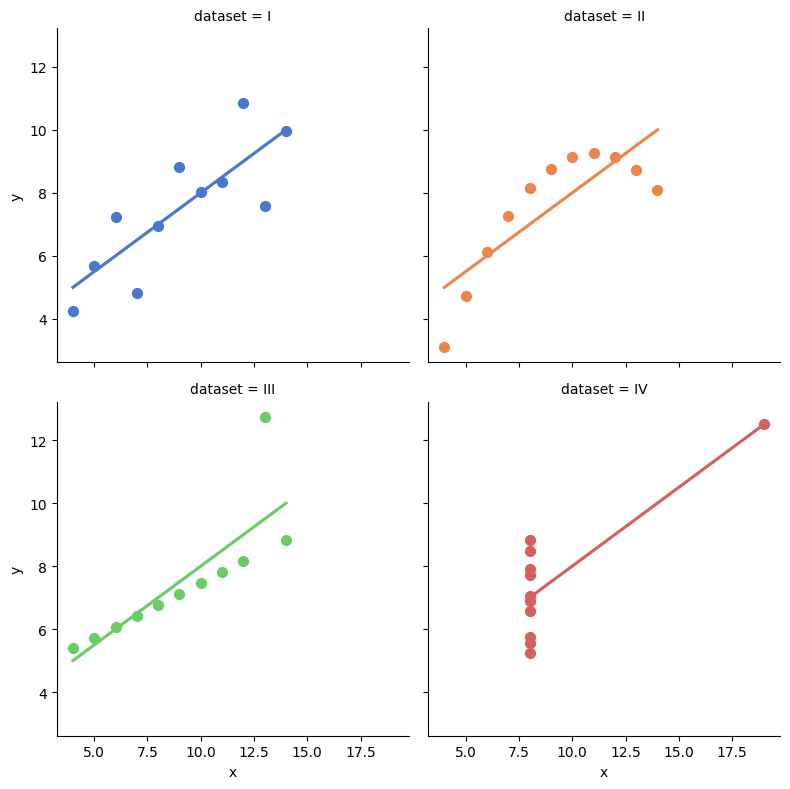

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
            col_wrap=2, ci=None, palette='muted', height=4, scatter_kws={"s": 50, "alpha": 1});

From the diagrams above it is obvious that the fitted lines are basically identical - even though we have completely different data.  
In these cases, it is intentionally obvious that the model is having trouble fitting lines to data sets II, III, and IV. Usually it is necessary to look at the plot of the residuals to see these errors.

## Residual Plots



In a real data science project it is not enough to summarize the quality of your model in one value (like r-squared, RMSE...), you need to dig deeper and find out if the errors follow certain patterns. 
A common way to analyze this is to create so-called **Residual Plots**. These plots show - as the name suggests - the distribution of the residuals of your model. They are an essential part of any error analysis in regression problems!

We can create residual plots for each dataset with the function below.

In [7]:
# Defining function which calculates residuals and plots them
def get_residuals(dataset, color):
    # store true y values
    obs_values = anscombe[anscombe.dataset==dataset].y 
    # store predicted y values
    pred_values = get_summarystats(dataset)[0] * anscombe[anscombe.dataset==dataset].x + get_summarystats(dataset)[1] 
    # calculate residuals
    residuals = obs_values - pred_values
    # plot residuals
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(anscombe[anscombe.dataset==dataset].x, residuals, color=color)
    ax.set_ylabel("Residuals")
    ax.set_xlabel("x")
    fig.suptitle('Residual Scatter Plot')
    plt.show()

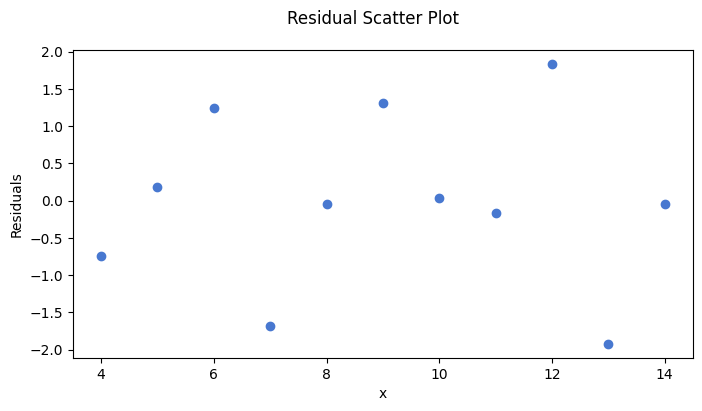

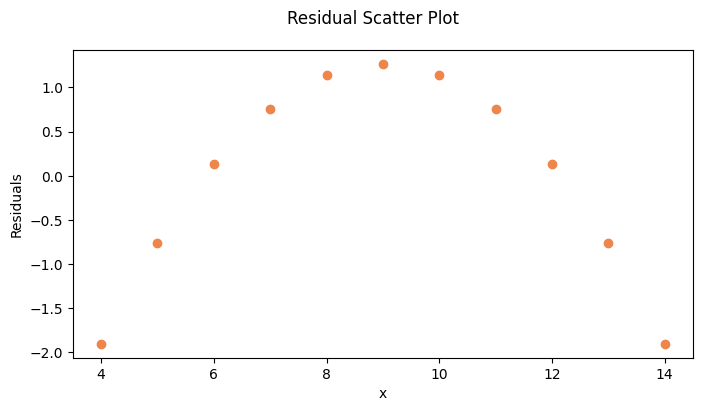

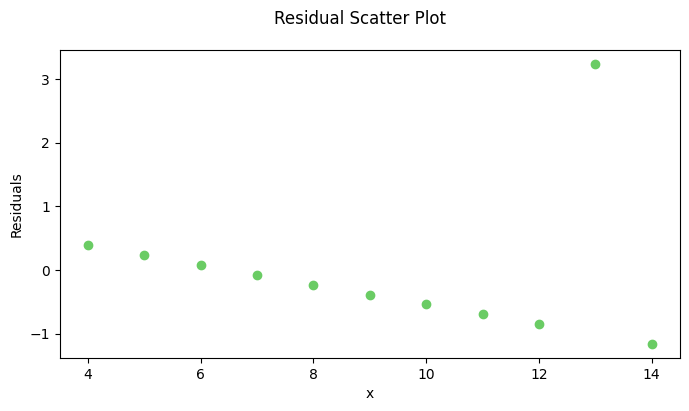

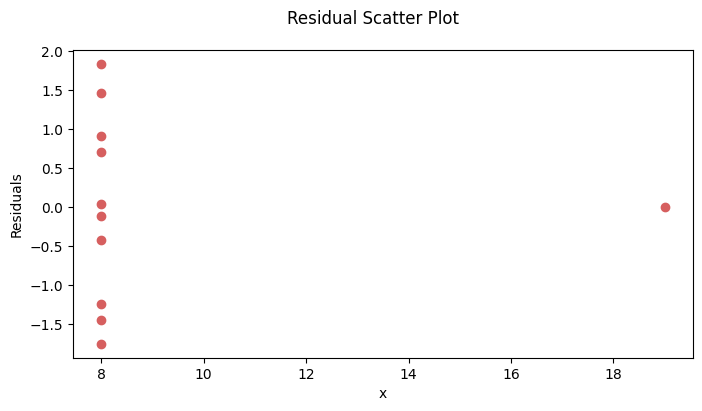

In [8]:
# Define same color palette as above
color = sns.color_palette('muted')

# Use defined function to plot residuals for all datasets
for dataset, c in zip('I II III IV'.split(), color):
    get_residuals(dataset, c) 

In a well-fitted model, the residuals are randomly distributed.  In our case, this is only true for data set I. For rather poorly fitted models, you will find patterns in your residual distribution as we can see for datasets II, III and IV. These patterns show us that our model is missing additional explanatory factors.  




### Further reading


If you want to learn more about residuals/residual plots at some point, you can start with these articles:

* [What are residuals in statistics?](https://www.statology.org/residuals/) 
* [How to use residuals for regression model validation?](https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378)
* [Interpreting residual plots to improve your regression](https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)
